# Daily Customer Transactions in Groceries
**PROJECT:** `2` <br>
**DATASET:** `4` <br>
**SECTION:** `S11` <br>
**GROUP:** `18` <br>
**MEMBERS:** <br> 
`EGUARAS, Sophia Louisse L.` <br>
`HERNANDEZ, Tedrick James B.` <br>
`MARCELO, Andrea Jean C. ` <br>

# `Data Representation`

### Data Structure
Taking a look into the dataset, its overall content is composed of several integers per row stretching to a couple of columns. Each row is unique from the other with each one having reaching different numbers of columns. As for the context of the dataset, it would mainly focus on describing **customer transactions in a grocery**. Looking into the structure of the dataset, the **raw data** consists of **three hundred (300) observations** and at most **eight (8) variables**. 

As for the observations, each row uniquely describes a single customer transaction in a store. For this study, the transaction refers to a customer's basket containing items they intend to purchase. In relation to the observations, the variables on the other hand, for this study, represents the presence of a particular item in a customer's basket. 

At this section of the notebook, the raw data in the dataset uses integers within the range of **0-19** to represent an item in a single cell and an uneven distribution of columns per row. Each unique integer in a specific row represents an item's name (e.g. "5" refers to "*Apples*", "10" refers to "*Coffee*"). We could think of it as 1 to 2-digit 'bar codes' representing an item for each integer in a cell. Later into the study, these would be converted into a different and much easier representation. After which, the variables (columns) would refer to a particular item name. It would make use of only **1's** and **0's** for its values where the former indicates an item is **present** in the basket while the latter indicates **otherwise**.

### EDA 3: `Is there a correlation between the number of items purchased and the number of occurrences where the most frequently purchased item is included in the basket?`

Using the knowledge gained from the results on previous EDA questions, we arrive at the question whether the two results have any correlation or relationship. As a primary assumption on the dataset, baskets with more items may have the possibility of containing several different sets of frequently purchased items due to the large quantity.

To check whether the assumption can be true, we begin by 

**[Visualization 1: No graph]**

Judging from the generated above, we can see that **`<CHIKA>`**. To better see the results, we will be representing the data in a scatterplot to see if there is any relationship at all with the results.

**[Visualization 2: Graph]**

Based on the scatterplot above, it is clear that **`<CHIKA>`**

## Loading the Dataset into a DataFrame

### Import
Before we begin exploring the data, we would be importing the following libraries below.

Import **pandas** and **matplotlib**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the Dataset

Now that the necessary libraries are imported, we may load and begin reading the dataset's contents. For presentation purposes, we will be renaming the columns to `col1`, `col2`, etc. respectively.

In [2]:
cols = ["col1", "col2", "col3", "col4", "col5", "col6", "col7", "col8"]
temp_baskets = pd.read_csv('Dataset4.csv', names=cols)
temp_baskets.head()

,col1,col2,col3,col4,col5,col6,col7,col8
0,3,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,5,9.0,10.0,11.0,12.0,14.0,NaN,NaN
3,2,5.0,6.0,13.0,NaN,NaN,NaN,NaN
4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As depicted in the table above in reading our dataset, the raw data contains several `NaN` values as well as unique integers per row. This presentation may be quite difficult to understand and use in the study.

As mentioned in the `Data Representation` section, the columns in the raw dataset (unmodified) represent the number of items a basket contains. For instance, the first observation (Basket `0`) on the table above occupies two (`2`) columns with two unique integers, indicating that it contains a total of two items. To recall, the item names are represented as unique integers. For a better representation of the table without missing values, the columns would be replaced with the item names (in integer format) wherein a value of `1` under that column indicates the presence of that particular item in a basket (row).

Let's start by 'renaming' the string numbers found in the cells to integers beginning from `0-19` respectively. To do so, we will be creating a dictionary to contain the strings and integers wherein each one is mapped to the other by its corresponding new name. For example, item `3.0` is assigned integer `0`, `5.0` is to `1`, and so on.

In [3]:
values = temp_baskets.values.ravel()
values = [value for value in pd.unique(values) if not pd.isnull(value)]
value_dict = {}
for i, value in enumerate(values):
    value_dict[value] = i
    
print(value_dict)

{3.0: 0, 5.0: 1, 1.0: 2, 2.0: 3, 9.0: 4, 10.0: 5, 11.0: 6, 12.0: 7, 14.0: 8, 6.0: 9, 13.0: 10, 0.0: 11, 8.0: 12, 19.0: 13, 4.0: 14, 7.0: 15, 15.0: 16, 16.0: 17, 17.0: 18, 18.0: 19}


As of the moment, the current dataset representing customer transactions is comprised of several rows wherein each one consists of a list of string values representing items to be purchased in the store. We will be converting the current representation into a **list of list** wherein the item's assigned integer value is placed instead of its string value.

In [4]:
temp_baskets = temp_baskets.stack().map(value_dict).unstack()

baskets = []
for i in range(temp_baskets.shape[0]):
    basket = np.sort([int(x) for x in temp_baskets.iloc[i].values.tolist() if str(x) != 'nan'])
    baskets.append(basket)

### Displaying the list of baskets
Now that the dataset is represented as a list of lists, we will display the contents below. It should now list a total of `300` baskets along with its contents. Refering to the previous table and table below as an example, basket `0` should contain `0` and `1`, since `3.0` is in index `0` and `5.0` is in index `1`.

In [5]:
for i, basket in enumerate(baskets):
    print('Basket', i, basket)

Basket 0 [0 1]
Basket 1 [2 3]
Basket 2 [1 4 5 6 7 8]
Basket 3 [ 1  3  9 10]
Basket 4 [0]
Basket 5 [ 3  4  6 10 11 12]
Basket 6 [ 3  4  6 10 13]
Basket 7 [ 1  9 12 14 15]
Basket 8 [11 12 16 17]
Basket 9 [ 1 11]
Basket 10 [14 18]
Basket 11 [ 5 12]
Basket 12 [ 1  3  4  7 18 19]
Basket 13 [ 4  9 12 13 17 18 19]
Basket 14 [ 7 15 16 18]
Basket 15 [4 7]
Basket 16 [ 0  5 10 11 12 13 17]
Basket 17 [ 2 12 16]
Basket 18 [ 4  6 10 13 15]
Basket 19 [ 5 14]
Basket 20 [ 0  4 17]
Basket 21 [ 0  2  4  6 11 12 16 19]
Basket 22 [ 4 11 12 13 15 18 19]
Basket 23 [ 2  8 16 18 19]
Basket 24 [18]
Basket 25 [ 2  3  5 11 12 13 15 18]
Basket 26 [ 1  2  4  5 11 19]
Basket 27 [17]
Basket 28 [ 7 12 19]
Basket 29 [ 3  4  7  8  9 13]
Basket 30 [ 2  3  5  9 11 19]
Basket 31 [ 0  1  6  9 12 13 14 15]
Basket 32 [4]
Basket 33 [ 0  3  7 10 14]
Basket 34 [16]
Basket 35 [15]
Basket 36 [ 3  4  8 11 15]
Basket 37 [ 3  7  9 10 14 18]
Basket 38 [ 1  3  6  9 10 14 17]
Basket 39 [ 2 11 17]
Basket 40 [ 2  8  9 12 13 14]
Basket 41 

### Converting the list of baskets into a dataframe
Taking our current dataset, we will then again convert it to a different representation, namely a matrix using `pandas.DataFrame`.

In [6]:
basket_df = pd.DataFrame([[0 for _ in range(20)] for _ in range(300)], columns=values)

for i, basket in enumerate(baskets):
    basket_df.iloc[i, basket] = 1

With the new dataset represented as a `DataFrame`, its new structure is now comprised of **three hundred (300) rows** and **twenty (20) columns** which represents the number of observations and number of distinct items in the dataset, respectively. For this representation, `1`'s and `0`'s are used to indicate if an item is present in a basket. Looking closely at each row `x`, a `1` on a particular column `y` indicates that the item is present in that basket (row). Otherwise, the value is `0` which indicates that particular item is not in the basket (row).

### Printing the dataframe
Let's print the values of our `DataFrame` and understand how the values relate with each other in this new representation.

In [7]:
# Rearranging the columns in ascending order
basket_df = basket_df.reindex(columns=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0])
# printing the DataFrame
basket_df

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0
297,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,1,0
298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Looking at the table above, let's take a look at row `0`. It has `1`'s on columns `3.0` and `5.0` while the rest have `0`'s. This simply means that there are two (`2`) items in basket `0` and they are items `3.0` and `5.0`. You may refer to the `list of lists` representation earlier prior to this conversion to check the correctness of the values in this `DataFrame`.

# `EXPLORATORY DATA ANALYSIS (EDA)`

Prior to performing any data mining techniques to the dataset, we will explore the dataset by formulating and answering EDA questions to prompt the latter sections of the study.

## EDA 1 `What item is the most frequently purchased by the customers?` 

In a grocery setting and context, it is common practice for store owners to educate themselves of commonly bought items in order to increase sales. To do so, they would study the store's customer transaction data.

In that case, using our dataset, we would only need to consider cells whose value is `1` in each column as this indicates that this particular item is bought by a customer in a single transaction. Each occurrence of `1` is tallied per column (item) and presented. After which, the Mode could be identified within the generated data.

***Summary*** <br>
Central Tendency: Mode <br>
Visualization: Bar graph <br>

Let's begin with `Step 1: Identify which particular item has the highest number of occurrences in these baskets.`

### Counting the number of times an item is included in a single basket
First, we start by getting the number of times an item occurs in a basket as well as when it is not.

In [8]:
item_count_df = basket_df[[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0]].apply(pd.Series.value_counts)
item_count_df

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
0,224,220,228,244,236,235,241,244,227,219,250,231,231,240,244,234,241,232,228,227
1,76,80,72,56,64,65,59,56,73,81,50,69,69,60,56,66,59,68,72,73


The table above represents the number of times an item is included in a basket. The columns each represent a single distinct item while the rows indicate the cumulative times the item appeared in the basket. Row `0` represents the number of times an item is **not** present in a transaction while row `1` is **otherwise**.

### Transposing the DataFrame
For a better representation of the dataset, we will be transposing it. Likewise with the previous table, column `0` shows the number of times where the item is not included in the basket. On the other hand, column `1` shows the number of times the item is included in the basket. 

In [9]:
item_count_df_transposed = item_count_df.transpose()
item_count_df_transposed

,0,1
0.0,224,76
1.0,220,80
2.0,228,72
3.0,244,56
4.0,236,64
5.0,235,65
6.0,241,59
7.0,244,56
8.0,227,73
9.0,219,81


As we would only be needing the tally for when the item is included in the basket, we remove column `0` from the table.

In [10]:
del item_count_df_transposed[0]
item_count_df_transposed

,1
0.0,76
1.0,80
2.0,72
3.0,56
4.0,64
5.0,65
6.0,59
7.0,56
8.0,73
9.0,81


From the data above, we can see the tallied results of the dataset for each item bought. By removing unnecessary data, we obtain a simpler table that is easier to digest. From the table, we can easily understand, for instance, row `0` whose item is `0.0` occurs `76` times within the whole dataset. The rest is similarly interpreted. However, this table does not clearly show and answer the EDA question. 

### Visualization
With the current representation, the Mode is not that obvious as the data is sorted differently. Without having to re-sort it, we can place the results in a graph for better representation and visualization. Instead of sorting the table, we have to place the generated results into a bar graph for visualization which will show the differences in item count.

Text(0.5, 1.0, 'Count per Item')

<Figure size 1440x720 with 0 Axes>

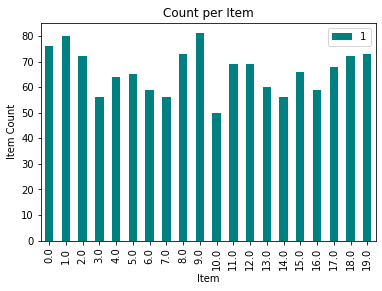

In [11]:
fig = plt.figure(figsize=(20,10))
item_count_df_transposed.plot.bar(color='teal')
plt.xlabel('Item')
plt.ylabel('Item Count')
plt.title('Count per Item')

In this type of visualization, the Mode could clearly be seen among the other bars. Right off the bat, we can see two leading bars in the graph, namely item `1.0` and `9.0`. On the other hand, item `10.0` has the lowest count and is not commonly bought by the customers.

### Result
Based on the generated graph and table presented earlier, the item frequently bought by customers is item `9.0` with a total of number of eighty-one `81` purchases, followed by item `1.0` with eighty `80`purchases.

## EDA 2 `How many items do customers purchase usually?` 
Customers that purchase multiple items in a single transaction may increase frequency of other items. In this case, it would be natural to learn about the the usual number of items a basket contains per transaction. We may potentially see the presence of certain sets of items in a basket with multiple items and in turn, be able to answer the last EDA question.

To do so, we would be approaching this similar to how the first EDA was answered which is by tallying the total occurrences of `1` in the dataset. However, for this question, the tally is done row-wise instead of column-wise like what was done before. As we are focused on knowing the Mean number of items bought by a customer, our target is the occurence of `1`'s per observation. After which, we would get the average of each row and obtain the Mean.

***Summary*** <br>
Central Tendency: Mean <br>
Visualization: Bar graph <br>

For this question, we would follow through the process below:

`Step 1:` Transpose the Basket DataFrame <br>
`Step 2:` Get the count of present and not present items per basket <br>
`Step 3:` Transpose the resulting DataFrame for the bar plot <br>

To begin, we will now tranpose our current basket `DataFrame` to switch the places of the item names and baskets, making the next step easier to do.

In [12]:
basket_df_transposed = basket_df.transpose()
basket_df_transposed

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0.0,0,0,0,0,0,1,0,0,1,1,...,0,0,1,1,0,0,0,0,0,0
1.0,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,0,1,0,0
2.0,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4.0,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
5.0,1,0,1,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
6.0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
7.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8.0,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,1
9.0,0,0,1,0,0,1,1,0,0,0,...,1,1,0,0,0,0,1,0,0,1


### Showing the number of items in a Basket
The data above shows the same dateset but with a switched row and column. Using the result, we can proceed to computing for the Mode. Let's get the number of items included and not included for each basket. For example, Basket `0` has `2` out of the `20` items in it based on the table above representing the dataset. Therefore, there are `18` items that are not included in Basket `0`, which will be shown in the next coding segment below.

In [13]:
numbers = []*300
for i in range(300):
    numbers.append(i)
basket_list_df = basket_df_transposed[numbers].apply(pd.Series.value_counts)
basket_list_df_transposed = basket_list_df.transpose()
basket_list_df_transposed

,0,1
0,18,2
1,18,2
2,14,6
3,16,4
4,19,1
...,...,...
295,18,2
296,15,5
297,13,7
298,19,1


Additionally, since we are only concerned with purchased items, we woud only need the number of items that is **present** in each basket. In that case, we will remove column `0` which represents the number of items that are not in the basket.

In [14]:
del basket_list_df_transposed[0]
basket_list_df_transposed

,1
0,2
1,2
2,6
3,4
4,1
...,...
295,2
296,5
297,7
298,1


Now that we have the `DataFrame` representing the number of items each basket has, we can now count and group baskets that have the same amount of items.

In [17]:
num_items_per_transact = basket_list_df_transposed[1].value_counts()[[1,2,3,4,5,6,7,8]]
num_items_per_transact

1    43
2    44
3    30
4    31
5    37
6    44
7    38
8    33
Name: 1, dtype: int64

From the data presented above, the minimum number of items a basket has is `1` while the maximum is `8`. Each observation here represents a group of baskets. Column `0` indicates the number of items a basket may have while column `1` indicates the number of baskets that have that many items. For instance, row `0` shows how many baskets have only purchased `1` item. In this case, there are exactly `43` baskets that have only `1` item in it, row `1` states that there are `44` baskets that only have `2` items in it, and so on.

### Visualization 
Likewise with the previous question, the generated result would also be accompanied with a visualization of the data below. A Bar Plot was chosen to present the differences among the number of occurences per item count in each basket.

Text(0.5, 1.0, 'Number of occurences per Item Count in each Basket')

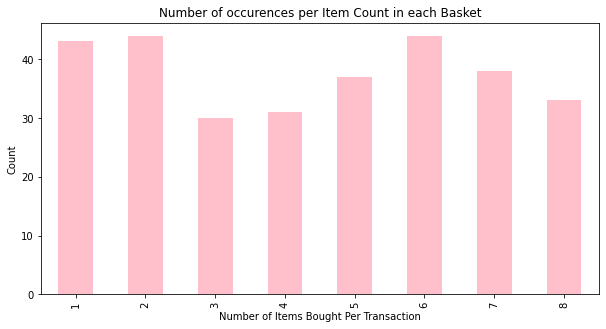

In [18]:
fig = plt.figure(figsize=(10,5))
num_items_per_transact.plot.bar(color='pink')
plt.xlabel('Number of Items Bought Per Transaction')
plt.ylabel('Count')
plt.title('Number of occurences per Item Count in each Basket')

### Result
As seen in the graph and table presented above,  we could say that the customers usually buy `2` or `6` items. This is closely followed by customers buying only `1` item, and so on.

# `Data Mining (Association Rule Mining)`
In this section, we begin applying data mining techniques to the current dataset. For this study, we will make use of Associated Rule Mining techniques to further delve into the EDA questions.

Let's start by **`<CHIKA>`**

# `Insights and Conclusions`
In this section, we will discuss the results andknowledge gained from the whole study, heavily on the EDA and Data Mining sections.

For **`<CHIKA>`**